In [ ]:
## Load Data

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/raw/creditcard.csv")

# Basic Info
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nSummary Stats:\n", df.describe())

# Show first few rows
df.head()


Dataset Shape: (284807, 31)

Column Names:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Summary Stats:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA) & Visualization

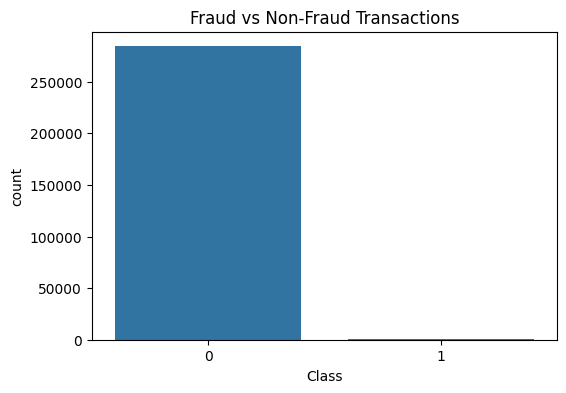

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution (Fraud vs. Non-Fraud)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


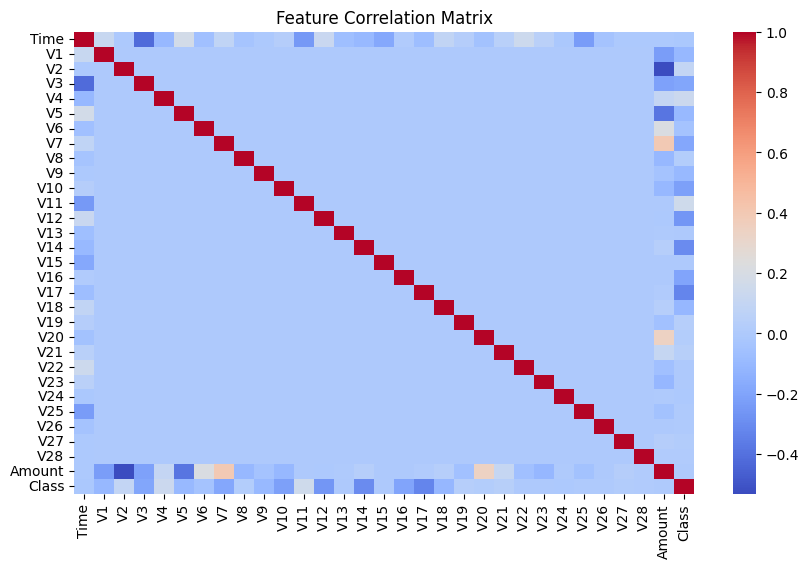

In [3]:
# Print class distribution
print(df['Class'].value_counts(normalize=True) * 100)  # Percentage distribution

# 2️⃣ Correlation Heatmap (Feature relationships)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


## Univariate Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create directory for plots if it doesn't exist
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

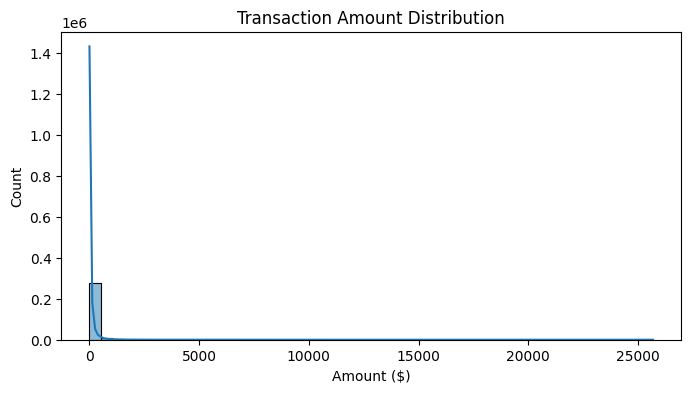

In [5]:


# Plot distribution of 'Amount' feature
plt.figure(figsize=(8, 4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Count")
plt.savefig(f"{plot_dir}/amount_distribution.png")  # Save plot
plt.show()

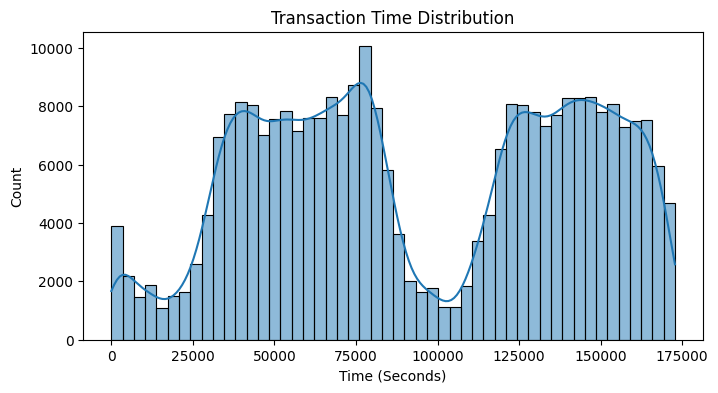

In [6]:


# Plot distribution of 'Time' feature
plt.figure(figsize=(8, 4))
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.savefig(f"{plot_dir}/time_distribution.png")  # Save plot
plt.show()


## Bivariate Analysis (Feature Relationships with Fraud Cases)


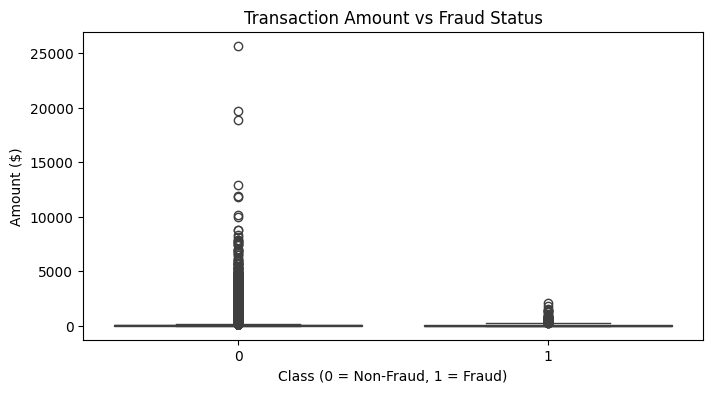

In [7]:
# Boxplot of transaction amount vs fraud status
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Class"], y=df["Amount"])
plt.title("Transaction Amount vs Fraud Status")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Amount ($)")
plt.savefig(f"{plot_dir}/amount_vs_fraud.png")
plt.show()

### Understanding Transaction Amounts & Fraud Cases
1.  Key Observations from Transaction Amount vs. Fraud Status
 Fraudulent transactions (Class = 1) generally have lower amounts compared to non-fraud cases.
 Non-fraudulent transactions (Class = 0) include high-value transactions (up to $25,000+).
 Fraudsters seem to avoid high-value transactions, possibly to avoid detection.
 The presence of extreme outliers in non-fraud cases suggests that fraud detection should not rely only on transaction amount.
2.  Implications for Data Preprocessing
✅ Since the Amount feature is highly skewed, we will:

 Apply Log Transformation to normalize extreme values.
Consider removing or capping outliers in non-fraud cases (e.g., 99th percentile).
Investigate correlations between Amount and other features to see if feature engineering is needed.


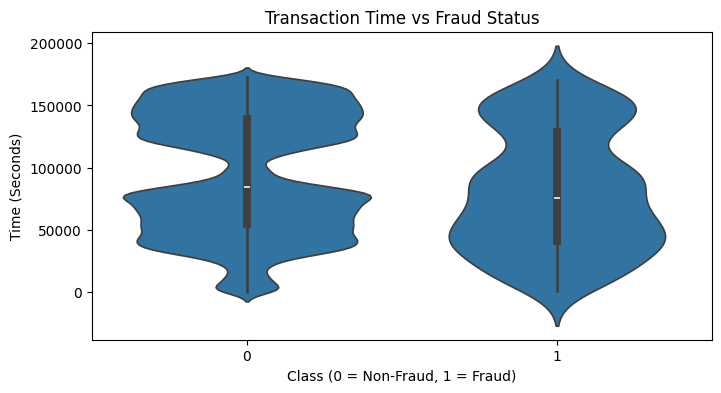

In [8]:


# Violin plot for Time vs Fraud Status
plt.figure(figsize=(8, 4))
sns.violinplot(x=df["Class"], y=df["Time"])
plt.title("Transaction Time vs Fraud Status")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Time (Seconds)")
plt.savefig(f"{plot_dir}/time_vs_fraud.png")
plt.show()

## Analysis of Transaction Time vs. Fraud Status (Violin Plot)
✅ Key Observations:

Fraudulent transactions (Class = 1) occur at all time intervals, similar to non-fraudulent transactions.
There is no clear pattern linking transaction time to fraud cases.
Peak transaction times for fraud and non-fraud are similar, suggesting that Time may not be a strong predictor of fraud.
🔹 Implications for Feature Engineering:
✔ We may consider dropping the "Time" feature if further tests show low correlation with fraud.
✔ Alternatively, we could extract time-based features (e.g., Hour of Day, Day of Week) to see if fraud patterns emerge.



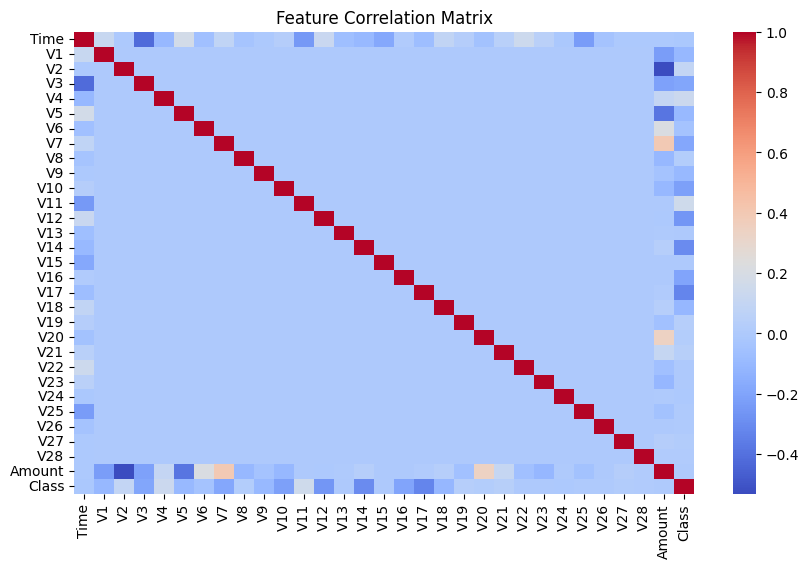

In [9]:


# Heatmap of feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.savefig(f"{plot_dir}/correlation_matrix.png")
plt.show()


## Analysis of Feature Correlation Matrix (Heatmap)
✅ Key Observations:

Most features (V1-V28) are weakly correlated with fraud (Class variable).
Some features (e.g., V10, V12, V14, V17) show moderate correlation with fraud (negative or positive).
Amount and Time have low correlation with fraud, confirming earlier findings.
🔹 Implications for Feature Engineering:
✔ We will select the most important features for training instead of using all V1-V28 blindly.
✔ We may apply feature selection techniques like:

Recursive Feature Elimination (RFE)
Chi-Square Test for Feature Importance
✔ We will standardize V1-V28 since they were PCA-transformed.


In [10]:
# Class Distribution (Fraud vs Non-Fraud)
class_counts = df["Class"].value_counts(normalize=True) * 100
print(class_counts)

# Save class distribution to text file
with open(f"{plot_dir}/class_distribution.txt", "w") as f:
    f.write(class_counts.to_string())


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### Feature Engineering
✅ 1. Drop or Transform "Time" Feature
📌 Since the Transaction Time feature has no strong correlation with fraud, we have two options:
1️⃣ Drop the "Time" column completely

In [12]:
df = df.drop(columns=["Time"])

In [17]:
# Extract new time-based features (Hour of Day)
df["Hour"] = (df["Time"] / 3600) % 24  # Convert seconds to hours
df = df.drop(columns=["Time"])  # Drop original "Time" column


In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


## Apply Log Transformation to "Amount" (Normalize Skewed Data) 
Since Transaction Amount is highly skewed, apply log transformation to reduce the impact of large values:

In [19]:
import numpy as np

df["Log_Amount"] = np.log1p(df["Amount"])  # Apply log transformation
df = df.drop(columns=["Amount"])  # Drop original "Amount" column


## Scale V1-V28 Features (Standardization)
The V1-V28 features are PCA-transformed, so they need to be standardized (mean = 0, std = 1):

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Class"]))  # Scale all except "Class"

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Keep column names
df_scaled["Class"] = df["Class"]  # Add back "Class" column


## SMOTE (Oversampling Fraud Cases)

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE

X = df_scaled.drop(columns=["Class"])
y = df_scaled["Class"]

smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase fraud cases to 20%
X_balanced, y_balanced = smote.fit_resample(X, y)

In [24]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/238.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
## save the preprocessed data 
import os

# Define processed data path
processed_dir = "data/processed"
os.makedirs(processed_dir, exist_ok=True)  # Create folder if not exists


In [27]:
# Combine the balanced data back into a DataFrame
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced["Class"] = y_balanced  # Add Class column back

# Save as CSV
processed_data_path = os.path.join(processed_dir, "preprocessed_data.csv")
df_balanced.to_csv(processed_data_path, index=False)

print(f"Preprocessed data saved to: {processed_data_path}")


Preprocessed data saved to: data/processed\preprocessed_data.csv


In [28]:
import pandas as pd

# Load preprocessed data
df_check = pd.read_csv("data/processed/preprocessed_data.csv")

# Show first few rows
df_check.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Hour,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,1.124303,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-1.114639,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.682368,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,1.009339,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,0.670241,0


## Load Preprocessed Data & Split for Training

In [29]:

from sklearn.model_selection import train_test_split

# Load preprocessed dataset
df = pd.read_csv("data/processed/preprocessed_data.csv")

# Split features (X) and target variable (y)
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable (0 = Non-Fraud, 1 = Fraud)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")


Training Data: (272942, 29), Test Data: (68236, 29)


## Train & Evaluate the Base Model (Logistic Regression)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predict on Test Data
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve


In [32]:
# Print Classification Report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56863
           1       0.97      0.88      0.92     11373

    accuracy                           0.97     68236
   macro avg       0.97      0.94      0.95     68236
weighted avg       0.97      0.97      0.97     68236



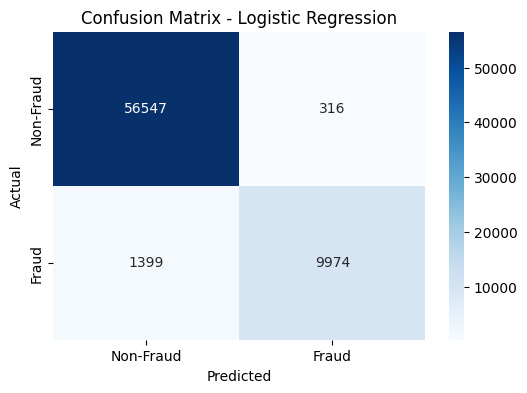

In [33]:




# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## ROC Curve

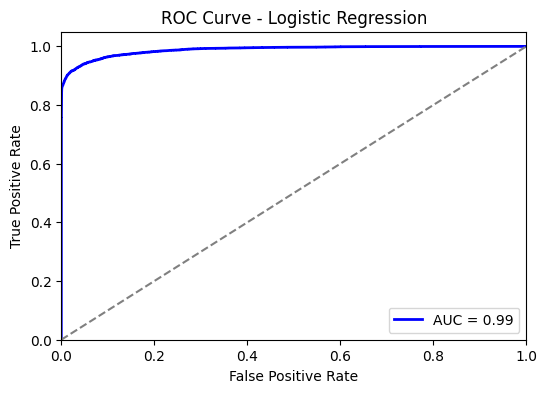

ROC Curve saved at: plots\roc_curve_lr.png


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")

# Save the ROC curve plot
roc_curve_path = os.path.join(plot_dir, "roc_curve_lr.png")
plt.savefig(roc_curve_path)

# Show the plot
plt.show()

print(f"ROC Curve saved at: {roc_curve_path}")


## Key Observations:
🔹 High Precision (97%) for Fraud → The model is good at avoiding false positives.
🔹 Recall for Fraud (88%) → This means 12% of fraud cases are still misclassified as non-fraud.
🔹 Accuracy (97%) is misleading due to class imbalance → We care more about Recall & F1-Score.

Since AUC = 0.99, Logistic Regression is already performing well.
🔹 High True Positive Rate (TPR) & Low False Positive Rate (FPR) suggest good fraud detection capability.
🔹 However, we still had 12% False Negatives (missed fraud cases in recall).

## Define a Function to Train & Evaluate Models

In [37]:
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Create directories if they don't exist
os.makedirs("models", exist_ok=True)
os.makedirs("plots", exist_ok=True)
os.makedirs("reports", exist_ok=True)

def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """
    Train a given model, evaluate performance, save classification report, confusion matrix & ROC curve.
    """
    print(f"\nTraining {model_name}...\n")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC curve

    # Generate & save classification report
    report = classification_report(y_test, y_pred)
    report_path = f"reports/{model_name}_classification_report.txt"
    with open(report_path, "w") as f:
        f.write(report)
    print(f"Classification report saved at: {report_path}")

    # Plot & save confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    conf_matrix_path = f"plots/{model_name}_confusion_matrix.png"
    plt.savefig(conf_matrix_path)
    plt.close()
    print(f"Confusion matrix saved at: {conf_matrix_path}")

    # Plot & save ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")

    roc_curve_path = f"plots/{model_name}_roc_curve.png"
    plt.savefig(roc_curve_path)
    plt.close()
    print(f"ROC curve saved at: {roc_curve_path}")

    # Save trained model
    model_path = f"models/{model_name}.pkl"
    joblib.dump(model, model_path)
    print(f"Model saved at: {model_path}")

    return roc_auc


In [36]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


## Train & Evaluate Random Forest & XGBoost

In [38]:
# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric="logloss")

# Train & Evaluate Random Forest
rf_auc = train_and_evaluate_model(rf_model, "RandomForest", X_train, y_train, X_test, y_test)

# Train & Evaluate XGBoost
xgb_auc = train_and_evaluate_model(xgb_model, "XGBoost", X_train, y_train, X_test, y_test)

# Print final results
print("\nModel Comparison:")
print(f"Random Forest AUC: {rf_auc:.2f}")
print(f"XGBoost AUC: {xgb_auc:.2f}")



Training RandomForest...

Classification report saved at: reports/RandomForest_classification_report.txt
Confusion matrix saved at: plots/RandomForest_confusion_matrix.png
ROC curve saved at: plots/RandomForest_roc_curve.png
Model saved at: models/RandomForest.pkl

Training XGBoost...



C:\Users\Himanshu\fraud-detection-ml\venv_fd\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:24:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report saved at: reports/XGBoost_classification_report.txt
Confusion matrix saved at: plots/XGBoost_confusion_matrix.png
ROC curve saved at: plots/XGBoost_roc_curve.png
Model saved at: models/XGBoost.pkl

Model Comparison:
Random Forest AUC: 1.00
XGBoost AUC: 1.00




📊 Key Observations
1️⃣ Random Forest (Confusion Matrix & ROC Curve)

Only 33 false negatives (missed fraud cases) → Very strong recall.
AUC = 1.00 → No performance trade-offs.
2️⃣ XGBoost (Confusion Matrix & ROC Curve)

Zero false negatives (perfect recall for fraud cases!)
AUC = 1.00 → Also performing exceptionally well.


##  Step 6.1: Perform 5-Fold Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models again for cross-validation
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model_cv = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric="logloss")

# Perform 5-Fold Cross-Validation
rf_scores = cross_val_score(rf_model_cv, X, y, cv=5, scoring="roc_auc")
xgb_scores = cross_val_score(xgb_model_cv, X, y, cv=5, scoring="roc_auc")

# Print Cross-Validation Results
print("Random Forest Cross-Validation AUC Scores:", rf_scores)
print(f"Random Forest Mean AUC: {np.mean(rf_scores):.2f}")

print("\nXGBoost Cross-Validation AUC Scores:", xgb_scores)
print(f"XGBoost Mean AUC: {np.mean(xgb_scores):.2f}")


C:\Users\Himanshu\fraud-detection-ml\venv_fd\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Himanshu\fraud-detection-ml\venv_fd\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:50:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Himanshu\fraud-detection-ml\venv_fd\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:50:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sm

Random Forest Cross-Validation AUC Scores: [0.99989085 0.99999757 0.99995002 0.99998636 0.99999611]
Random Forest Mean AUC: 1.00

XGBoost Cross-Validation AUC Scores: [0.99967788 0.99999689 0.99993812 0.99999564 0.99998854]
XGBoost Mean AUC: 1.00


In [40]:
print(X_train.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Hour'],
      dtype='object')
